In [4]:
# a. IMPORTING NECESSARY PACKAGES ->
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random


C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
# b. LOAD THE TRAINING AND TESTING DATA (MNIST) ->
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 25s 2us/step


In [6]:
# Normalize the pixel values to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:

# c. DEFINE THE NETWORK ARCHITECTURE USING KERAS ->
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# d. TRAIN THE MODEL USING SGD ->
model.compile(optimizer="sgd",
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)



Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6581 - accuracy: 0.8326 - val_loss: 0.3576 - val_accuracy: 0.9030
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3358 - accuracy: 0.9064 - val_loss: 0.2891 - val_accuracy: 0.9196
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2850 - accuracy: 0.9197 - val_loss: 0.2563 - val_accuracy: 0.9259
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2536 - accuracy: 0.9286 - val_loss: 0.2341 - val_accuracy: 0.9346
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2311 - accuracy: 0.9346 - val_loss: 0.2153 - val_accuracy: 0.9377
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2126 - accuracy: 0.9398 - val_loss: 0.2008 - val_accuracy: 0.9439
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1972 - accuracy: 0.9445 - val_loss: 0.1876 - val_accuracy:

In [10]:
# e. EVALUATE THE NETWORK
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss = {:.3f}".format(test_loss))
print("Test Accuracy = {:.3f}".format(test_acc))

313/313 [==============================] - 0s 739us/step - loss: 0.1605 - accuracy: 0.9531
Test Loss = 0.161
Test Accuracy = 0.953


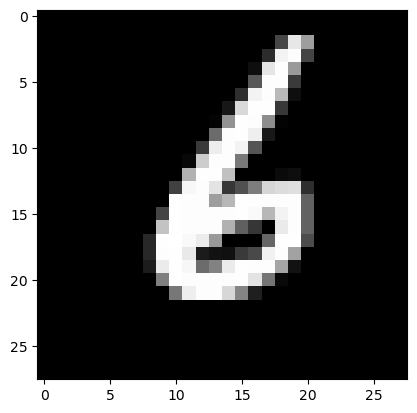

313/313 [==============================] - 0s 653us/step
Predicted Probabilities:  [1.17069521e-05 6.97590895e-06 2.54988990e-04 2.94714082e-05
 1.04391338e-05 8.59490829e-05 9.99571741e-01 1.02906576e-07
 2.79786454e-05 6.37761275e-07]


In [11]:
# Randomly choose an image from the test set to predict
n = random.randint(0, len(x_test) - 1)
plt.imshow(x_test[n], cmap="gray")
plt.show()
predicted_values = model.predict(x_test)
print("Predicted Probabilities: ", predicted_values[n])

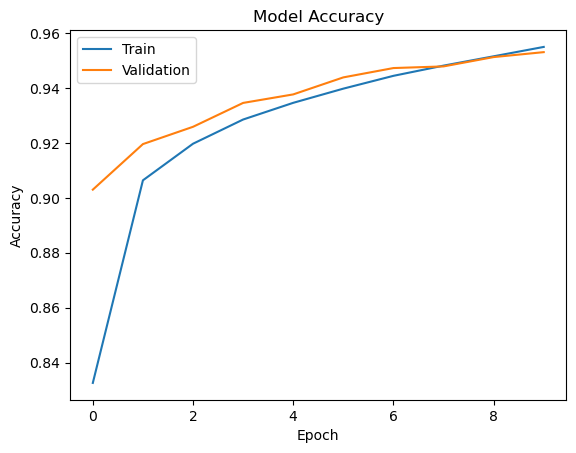

In [12]:
# f. PLOT THE TRAINING LOSS AND ACCURACY ->
# Plotting The Training Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

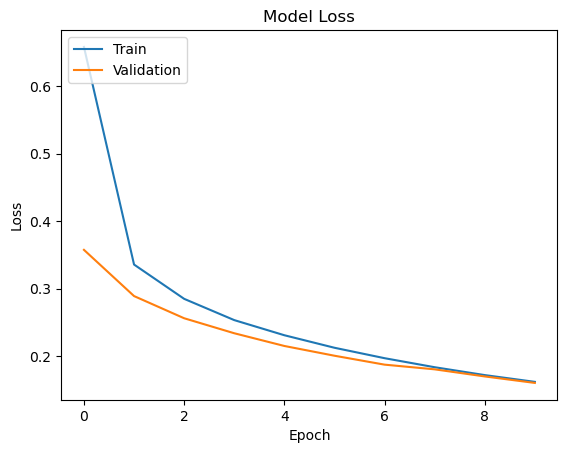

In [13]:
# Plotting The Training Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()